# Adedeji ESAN Project: Feature Selection & Model Tuning_Concrete Strength Prediction
# Problem statement (Concrete Strength ) 
To predict the concrete strength using the data available in file concrete_data.csv. Apply feature engineering and model tuning to obtain 80% to 95% of R-Square score. 

### Abstract: 
Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

The concrete compressive strength is a highly nonlinear function of age and ingredients .These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

#### Scoring mechanism:
The coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

# Dataset:
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learningdatabases/concrete/compressive/. 

- Data Set Characteristics:  Multivariate
- Number of Instances: 1030
- Area: Physical
- Attribute Characteristics: Real
- Number of Attributes: 9
- Date Donated: 2007-08-03
- Associated Tasks: Regression
- Missing Values? N/A
- Number of Web Hits: 207720

# Attribute Information: 
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the defined axis of the database. 

Name/Data Type/Unit of Measurement/Description 

- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable 
- Age(age) -- quantitative -- Day (1~365) -- Input Variable 
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable 

# 1. Import Libraries and load dataset

In [158]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

import numpy as np
import os,sys
from scipy import stats

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [160]:
ConcreteMPa_df = pd.read_csv('concrete.csv')

# 2. Exploratory data quality report reflecting the following

# 2.1 Univariate analysis  (10 marks): 
  - Data types and description of the independent attributes which should include:
    - name, meaning, range of values observed, central values (mean and median), 
    - standard deviation and quartiles, analysis of the body of distributions / tails, 
    - missing values, outliers plots, duplicates
    - strategies to address the different data challenges such as data pollution, 
    - outlier’s treatment and missing values treatment. 

In [161]:
ConcreteMPa_df.head()
#It is always a good practice to eye-ball raw data to get a feel of the data
#check the number of structure of the file, number of attributes, types of attributes and 
#a general idea of likely challenges in the dataset. The file is a comma separated file. 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [162]:
ConcreteMPa_df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.00,0.00,166.00,180.00,10.00,961.00,805.00,28,13.29
1026,531.30,0.00,0.00,141.80,28.20,852.10,893.70,3,41.30
1027,276.40,116.00,90.30,179.60,8.90,870.10,768.30,28,44.28
1028,342.00,38.00,0.00,228.00,0.00,932.00,670.00,270,55.06
1029,540.00,0.00,0.00,173.00,0.00,"1,125.00",613.00,7,52.61


The dataframe Head & Tail shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).

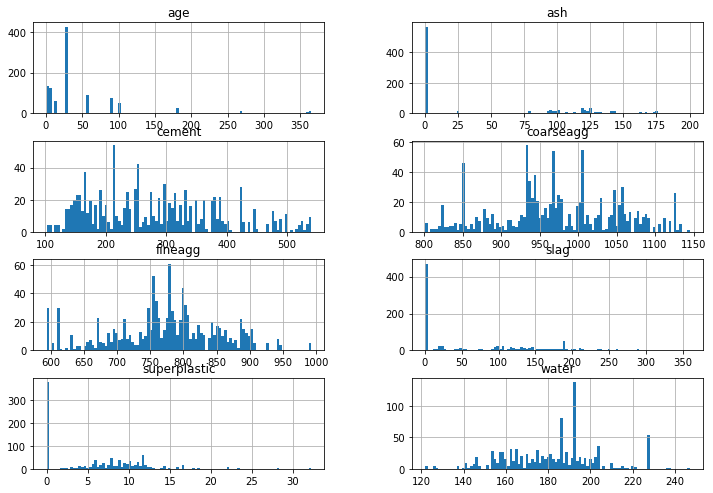

In [163]:
columns = list(ConcreteMPa_df)[0:-1] 
ConcreteMPa_df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of the integer columns

## Print the datatypes of each column and the shape of the dataset

In [164]:
ConcreteMPa_df.shape #Checking the shape of the data at 1030 rows & 9 columns

(1030, 9)

In [165]:
ConcreteMPa_df.info() 
#Checking the information of the data set, dtypes: float64(8), int64(1)_age


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.

In [166]:
ConcreteMPa_df.nunique() 
# checking for uniqueness and it look ok
# it is possible to have repeated data in each column due to the continuous nature of the variables

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [167]:
#checking for zeros in the data frame
(ConcreteMPa_df== 0).astype(int).sum(axis=0)

#The concrete compressive strength is a highly nonlinear function of age and ingredients
#These ingredients include:
# cement, blast furnace slag, fly ash, water,superplasticizer, coarse aggregate, and fine aggregate
# For different grades of concrete: slag, ash & superplastic may not be required, 
# hence a value of ZERO is possible and we will be not replace this values 
# Critical variable in the dataframe that cannot have ZERO are: 
# Cement, Water,coarse aggregate,fine aggregate, age & strength


cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

## Check for missing values

In [168]:
round(ConcreteMPa_df.isna().sum()*100/ConcreteMPa_df.shape[0],2) 
#check for % null values
# no missing values

cement         0.00
slag           0.00
ash            0.00
water          0.00
superplastic   0.00
coarseagg      0.00
fineagg        0.00
age            0.00
strength       0.00
dtype: float64

In [169]:
ConcreteMPa_df.isnull().sum()
# there are no missing values in the data set

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [170]:
ConcreteMPa_df.columns 
# Names of columns is ok & clear to understand. More information given above on each header (attribute info)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

## Print the descriptive statistics of each & every column using describe() function

In [171]:
ConcreteMPa_df.describe()
## check descriptive stats, IQR, Std..value count

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
We can see that cement,slag,ash are left skewed

In [172]:
#Checking for duplicates in the data set
# repeated numbers are expected as per continous variable data types
duplicate_in_concrete = ConcreteMPa_df.duplicated()
if duplicate_in_concrete.any():
    print(ConcreteMPa_df.loc[~duplicate_in_concrete], end='\n\n')

      cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0     141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1     168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2     250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3     266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4     154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025  135.00   0.00 166.00 180.00         10.00     961.00   805.00   28   
1026  531.30   0.00   0.00 141.80         28.20     852.10   893.70    3   
1027  276.40 116.00  90.30 179.60          8.90     870.10   768.30   28   
1028  342.00  38.00   0.00 228.00          0.00     932.00   670.00  270   
1029  540.00   0.00   0.00 173.00          0.00   1,125.00   613.00    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4 

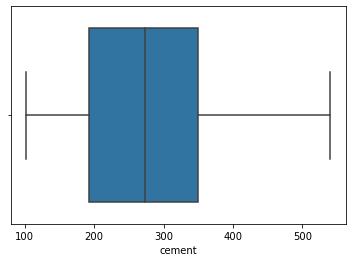

In [173]:
sns.boxplot(ConcreteMPa_df['cement']); #Univarite plot of cement

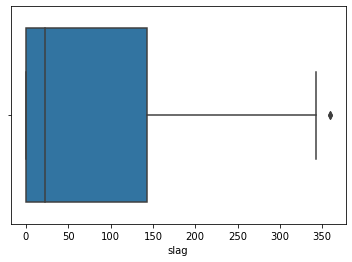

In [174]:
sns.boxplot(ConcreteMPa_df['slag']); #Univarite plot of slag

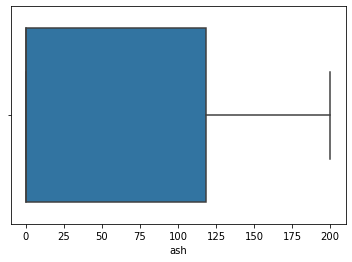

In [175]:
sns.boxplot(ConcreteMPa_df['ash']); 
#Univarite plot of ash produced in small dark flecks by the burning of powdered coal 

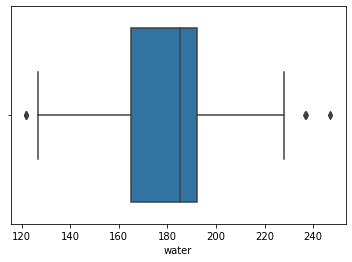

In [176]:
sns.boxplot(ConcreteMPa_df['water']); #Univarite plot of water

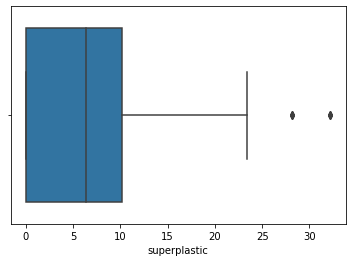

In [177]:
sns.boxplot(ConcreteMPa_df['superplastic']); #Univarite plot of superplastic

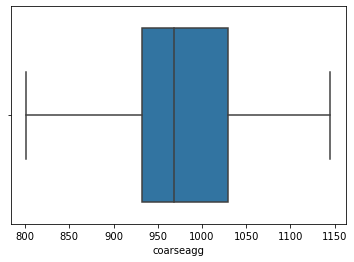

In [178]:
sns.boxplot(ConcreteMPa_df['coarseagg']); #Univarite plot of coarseagg

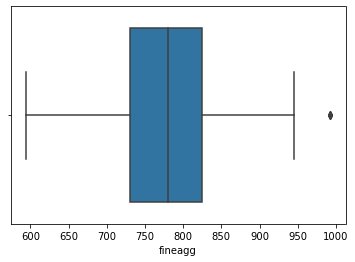

In [179]:
sns.boxplot(ConcreteMPa_df['fineagg']); #Univarite plot of fineagg

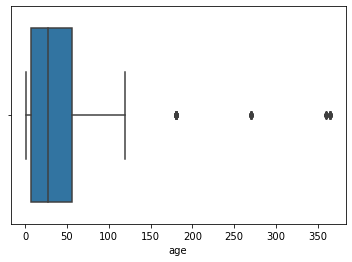

In [180]:
sns.boxplot(ConcreteMPa_df['age']); #Univarite plot of age

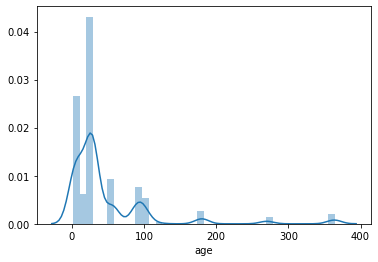

In [181]:
sns.distplot(ConcreteMPa_df['age']); #Univarite plot of age

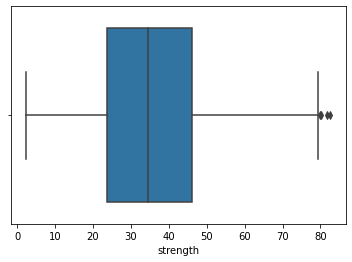

In [182]:
sns.boxplot(ConcreteMPa_df['strength']); #Univarite plot of strength our target variable

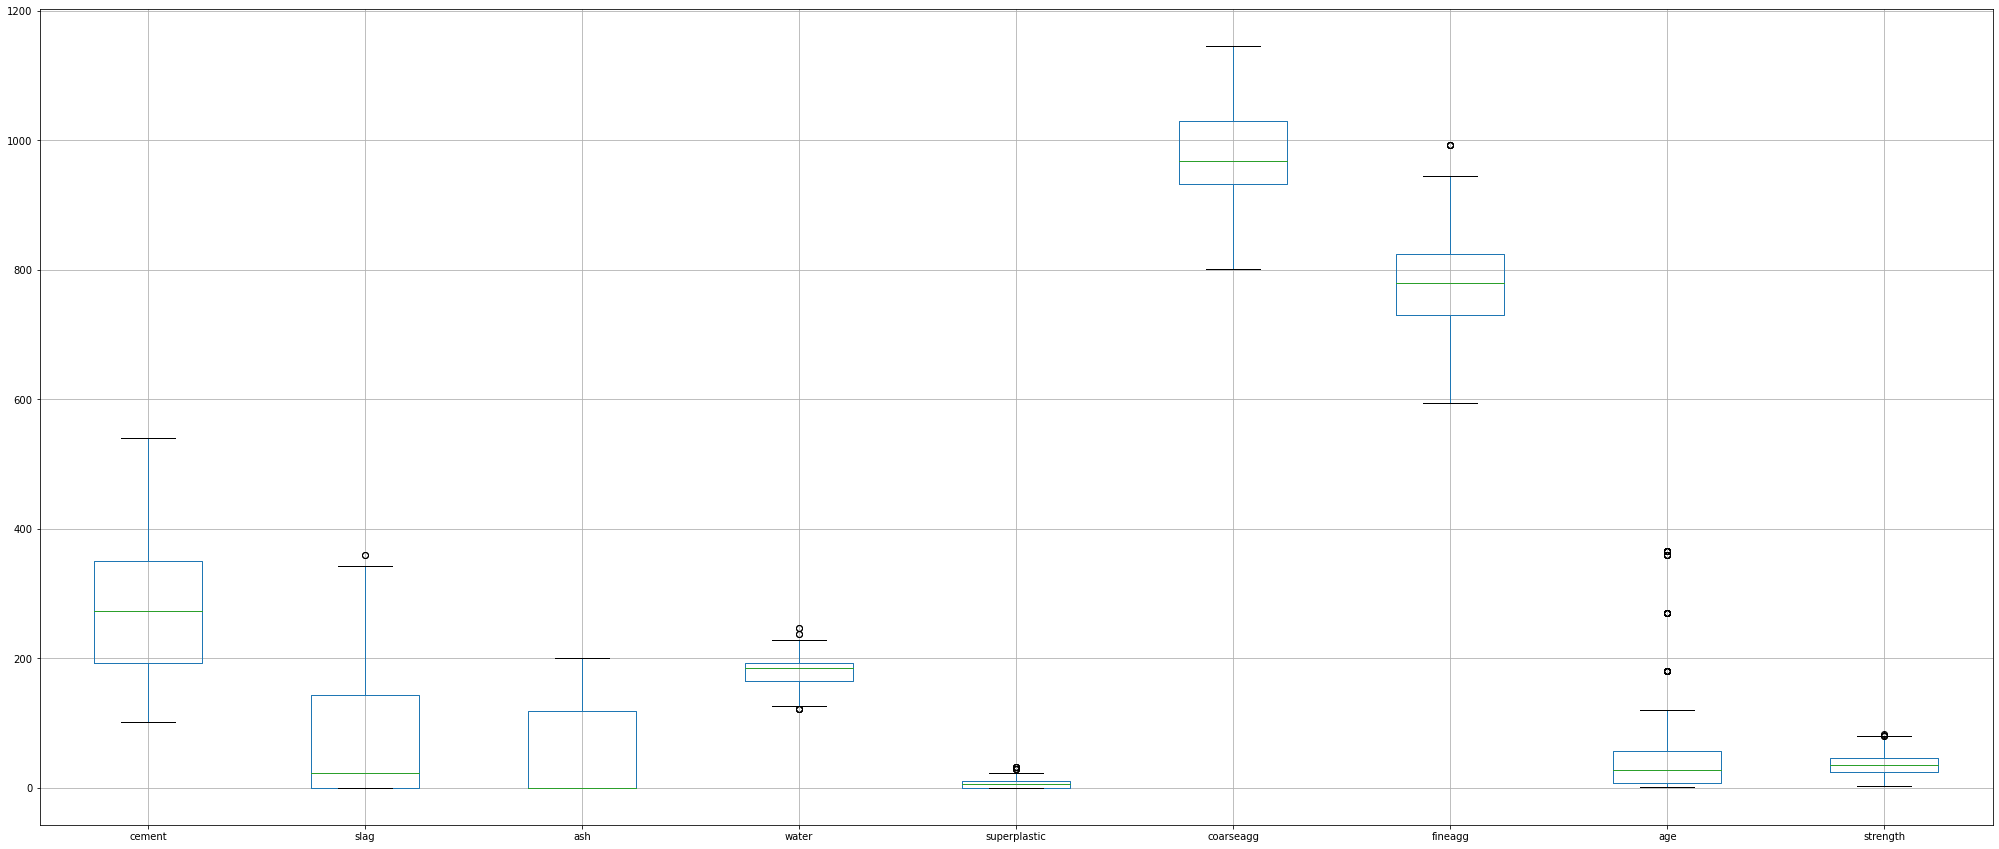

In [183]:
ConcreteMPa_df.boxplot(figsize=(35,15));
#create boxplot for all the attributes to visualise the outliers

In [184]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',ConcreteMPa_df[((ConcreteMPa_df.cement - ConcreteMPa_df.cement.mean()) / ConcreteMPa_df.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',ConcreteMPa_df[((ConcreteMPa_df.slag - ConcreteMPa_df.slag.mean()) / ConcreteMPa_df.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',ConcreteMPa_df[((ConcreteMPa_df.ash - ConcreteMPa_df.ash.mean()) / ConcreteMPa_df.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',ConcreteMPa_df[((ConcreteMPa_df.water - ConcreteMPa_df.water.mean()) / ConcreteMPa_df.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',ConcreteMPa_df[((ConcreteMPa_df.superplastic - ConcreteMPa_df.superplastic.mean()) / ConcreteMPa_df.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',ConcreteMPa_df[((ConcreteMPa_df.coarseagg - ConcreteMPa_df.coarseagg.mean()) / ConcreteMPa_df.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',ConcreteMPa_df[((ConcreteMPa_df.fineagg - ConcreteMPa_df.fineagg.mean()) / ConcreteMPa_df.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',ConcreteMPa_df[((ConcreteMPa_df.age - ConcreteMPa_df.age.mean()) / ConcreteMPa_df.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


Here, we have used std dev method to detect the outliers. If we have any data point that is more than 3x the std dev, then those points are very likely to be outliers.
We can see that slag, water, superplastic and age contain outliers.

Note: we will handle this outlier by the median. 
The median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.

In [185]:
# Handling the outliers and replacing the outliers by median
# Outliers can and do affect the median, 
# But the median is less liable to be distorted by outliers than the mean (average)

for col_name in ConcreteMPa_df.columns[:-1]:
    q1 = ConcreteMPa_df[col_name].quantile(0.25)
    q3 = ConcreteMPa_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    ConcreteMPa_df.loc[(ConcreteMPa_df[col_name] < low) | (ConcreteMPa_df[col_name] > high), col_name] = ConcreteMPa_df[col_name].median()

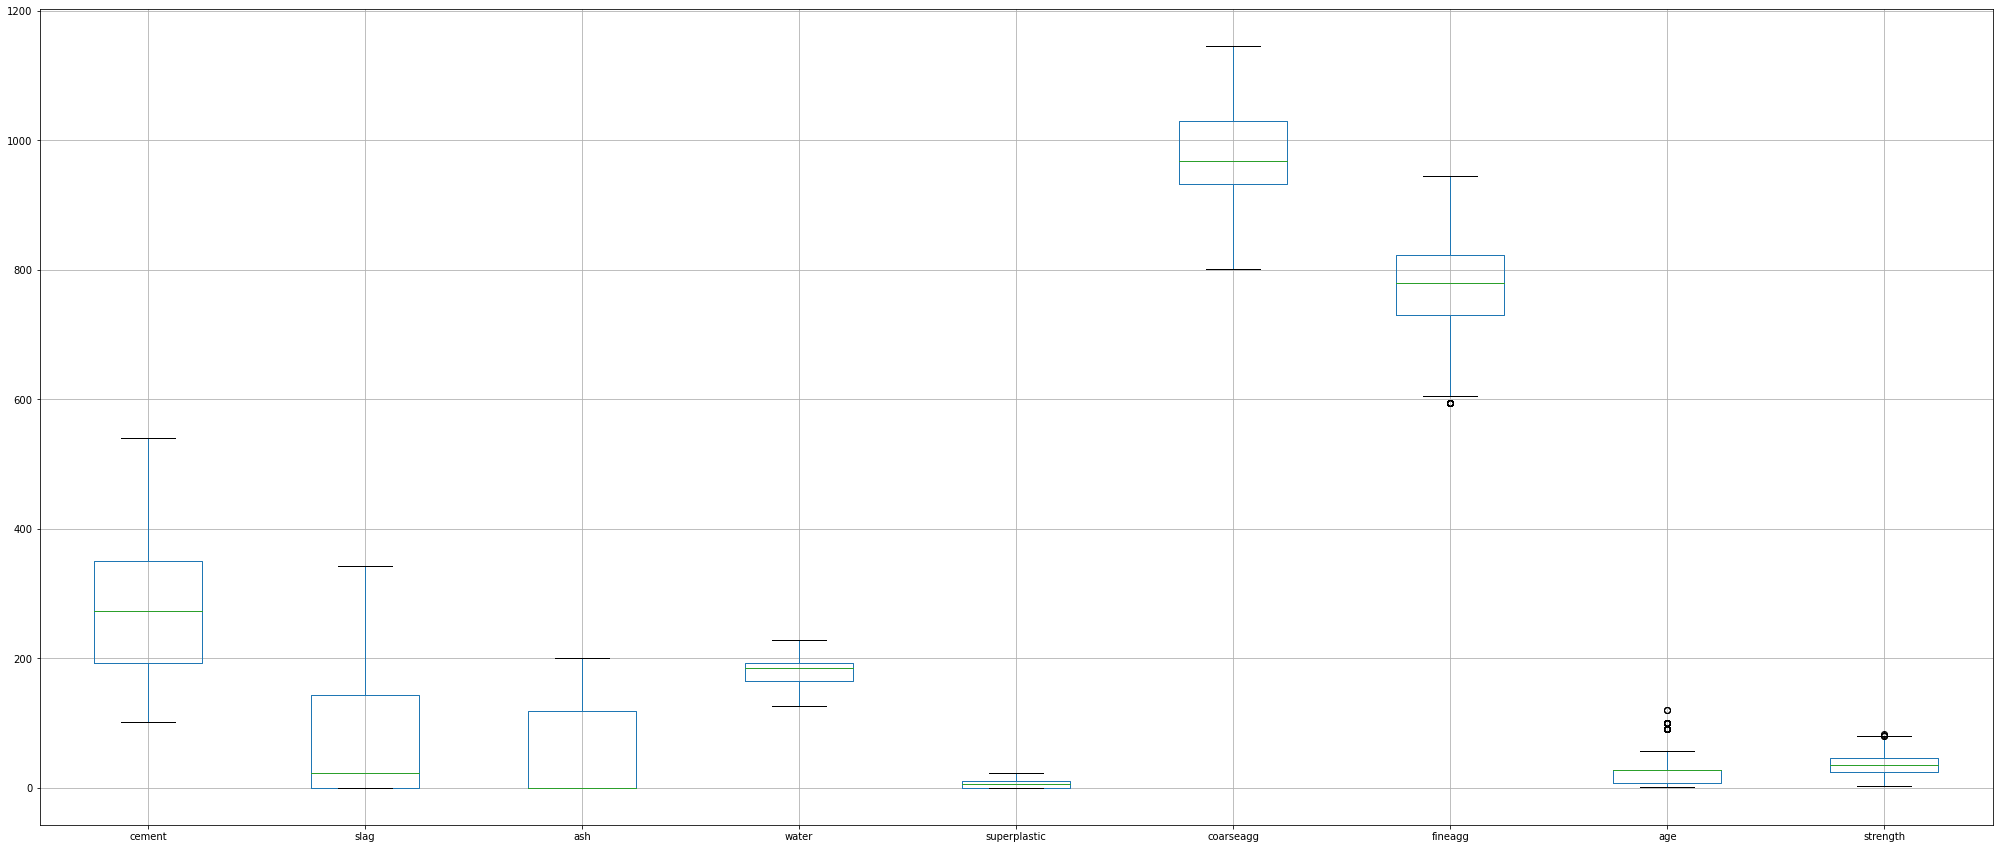

In [186]:
ConcreteMPa_df.boxplot(figsize=(35,15));
#visualize boxplot for all the attributes after handling the outliers

In [187]:
ConcreteMPa_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28.00,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14.00,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28.00,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28.00,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28.00,18.29


# 2.2. Multivariate analysis (10 marks) 
- Bi-variate analysis between the predictor variables and target column. 
    - Comment on your findings in terms of their relationship and degree of relation if any.
    - Visualize the analysis using boxplots and pair plots, histograms or density curves. 
    - Select the most appropriate attributes. 

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Using seaborn plot and check the relationship between different variables

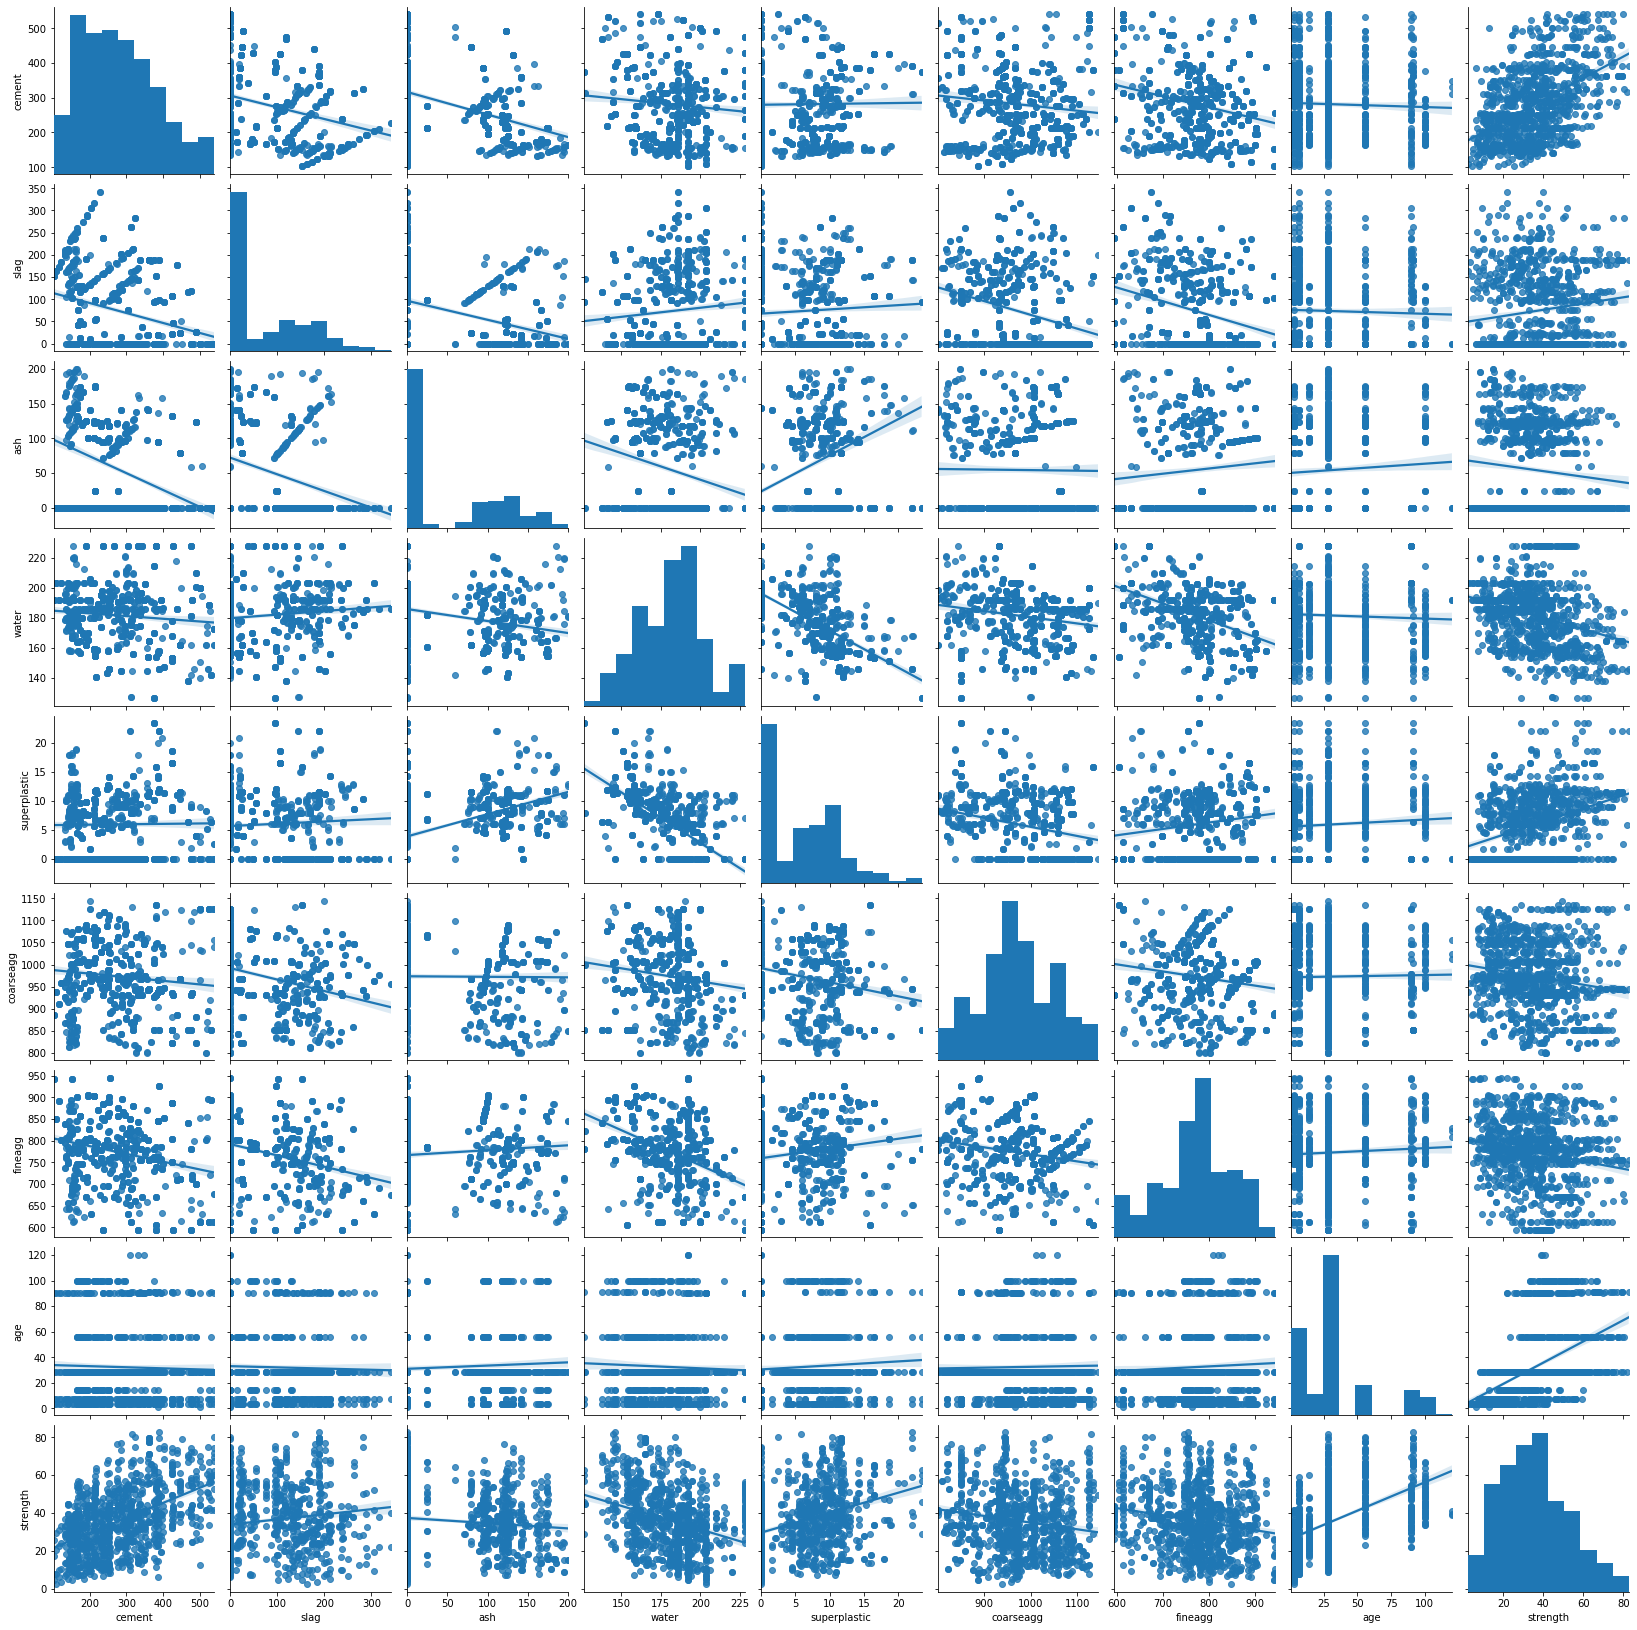

In [188]:
sns.pairplot(ConcreteMPa_df, kind='reg');

In [189]:
# Lets check for highly correlated variables
# No independent variable achieves the set threshold of 0.8
cor= ConcreteMPa_df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

Series([], dtype: float64)

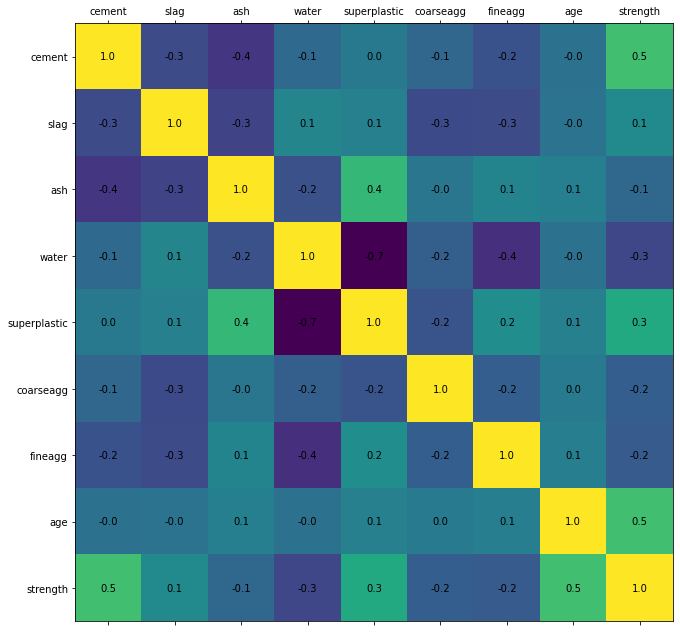

In [190]:
## let's visualize the correlation in graphical representation, below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plot_corr(ConcreteMPa_df)

Check for correlation between variables whose values are >0.8

### Observations:

Diagonal plots have already been discussed in the Observations of Univariate Analysis

There is no strong correlation between any independent variable and target variable (strength)

Correlation of ~0.7 between Superplast and Water which is a strong uphill (positive) linear relationship

Age and strength shows a correlation of ~0.5 whichs is moderate uphill (positive) relationship

Cement and strength also shows a correlation of ~0.5 whichs is moderate uphill (positive) relationship

However, the key is to see strong relationship between the target variable (strength) and the other independent variables


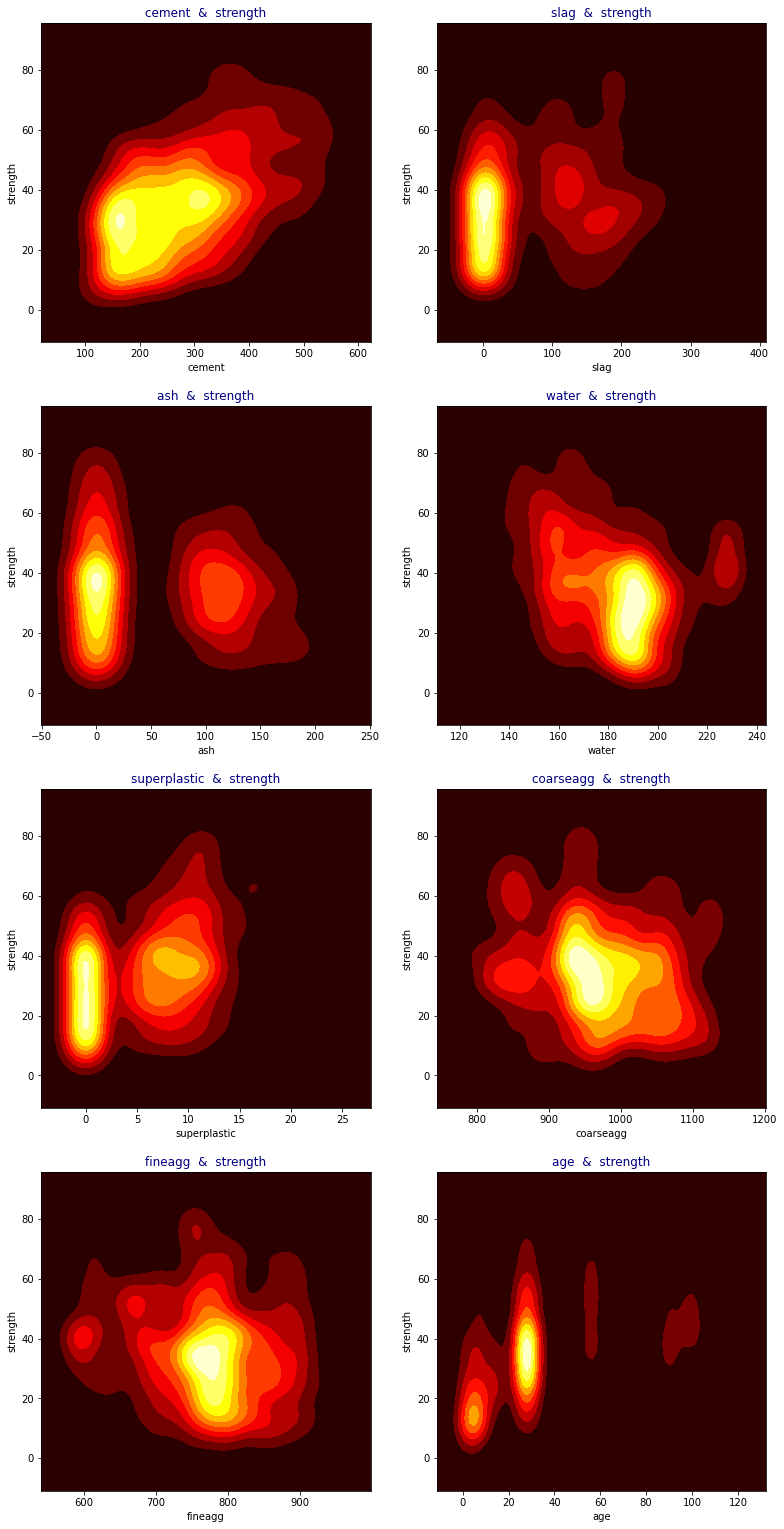

In [191]:
import itertools

# Contour plot to visualize the independent variables and the target variable strength
# Multiple node are obvious. No single independent variables is correlated with the target variable
# Cement vs Strenght shows a moderate correlation though 
# We will explore more correlation output further below in some other visualization of multivariate analysis

cols = [i for i in ConcreteMPa_df.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(ConcreteMPa_df[i],
               ConcreteMPa_df["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength",color="navy")

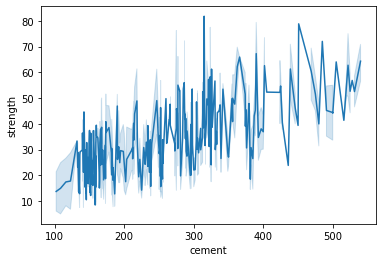

In [192]:
sns.lineplot(x="cement", y="strength", data=ConcreteMPa_df);
#Visualising cement and strenght relationship.
# correlation at 0.5 

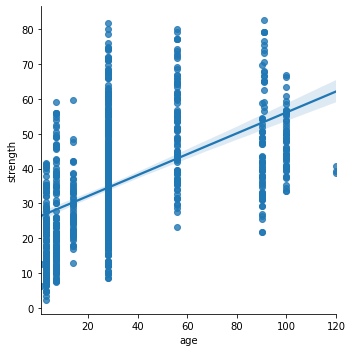

In [193]:
sns.lmplot(y="strength", x="age", data=ConcreteMPa_df);
# Visualisation strenght and age
# correlation at 0.5, 
# however there are significant variation along the target variable for each element of age?


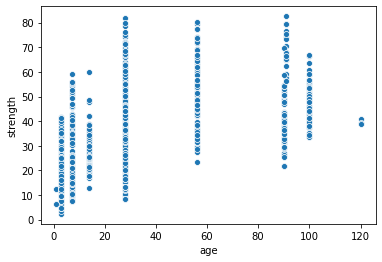

In [194]:
#Visualising age and strenght relationship.

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.scatterplot(x="age", y="strength",
                     palette=cmap, sizes=(10, 200),
                     data=ConcreteMPa_df);

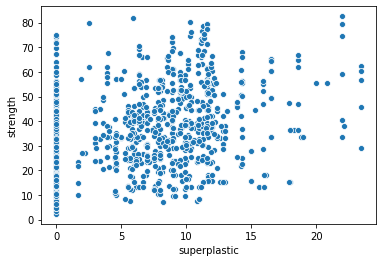

In [195]:
#Visualising superplastic and strenght relationship.
# No correlation with our target variable to much noise

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.scatterplot(x="superplastic", y="strength",
                     palette=cmap, sizes=(10, 200),
                     data=ConcreteMPa_df);

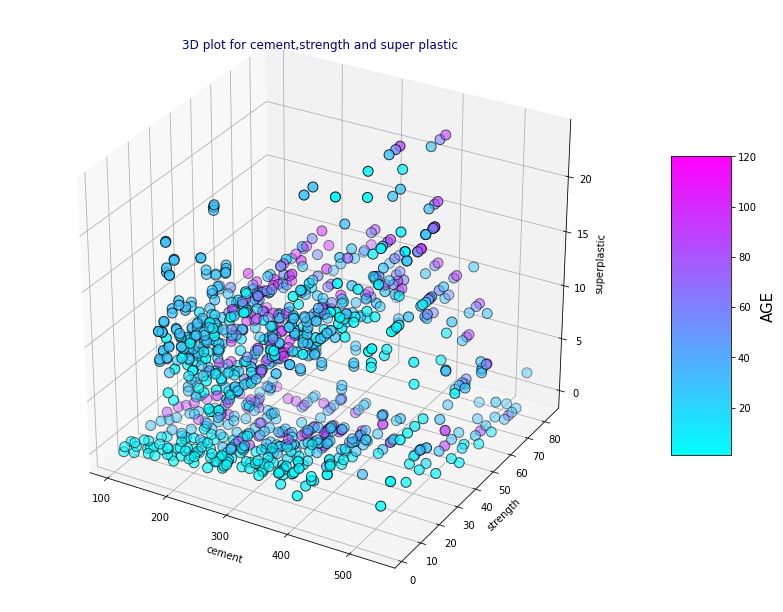

In [196]:
from mpl_toolkits.mplot3d import Axes3D
# Visualising 3D plot for cement, strength and superplastic
# X -Axis = cement, Y - Axis = compressive strength, Z - Axis = super plasticizer & Color = Age

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(ConcreteMPa_df["cement"],
          ConcreteMPa_df["strength"],
          ConcreteMPa_df["superplastic"],
           linewidth=1,edgecolor ="k",
           c=ConcreteMPa_df["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,strength and super plastic",color="navy")
plt.show()


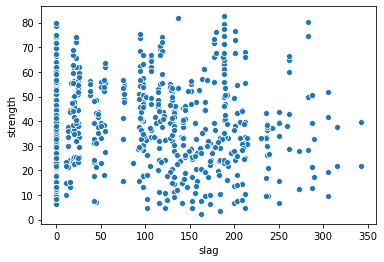

In [197]:
#Visualising slag and strenght relationship.
# No correlation with our target variable to much noise

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.scatterplot(x="slag", y="strength",
                     palette=cmap, sizes=(10, 200),
                     data=ConcreteMPa_df);

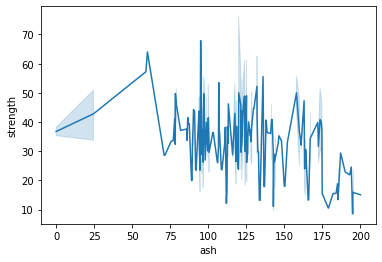

In [198]:
sns.lineplot(x="ash", y="strength", data=ConcreteMPa_df);
#Visualising ash and strenght relationship.
# No correlation with our target variable to much noise

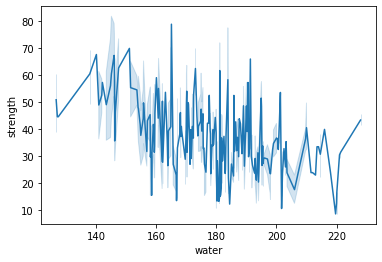

In [199]:
sns.lineplot(x="water", y="strength", data=ConcreteMPa_df);
#Visualising water and strenght relationship.


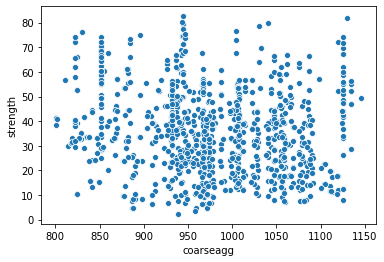

In [200]:
#Visualising coarseagg and strenght relationship.
# No correlation with our target variable.
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.scatterplot(x="coarseagg", y="strength",
                     palette=cmap, sizes=(10, 200),
                     data=ConcreteMPa_df);

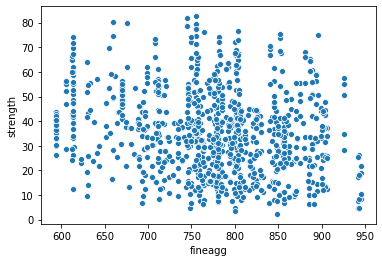

In [201]:
#Visualising fineagg and strenght relationship.
# No correlation with our target variable.

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.scatterplot(x="fineagg", y="strength",
                     palette=cmap, sizes=(10, 200),
                     data=ConcreteMPa_df);

In [202]:
ConcreteMPa_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28.00,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14.00,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28.00,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28.00,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28.00,18.29


# 3.0 Feature Engineering techniques (10 marks) 
- Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required) 
- Get data model ready and do a train test split. 
- Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree. 


## Prepare the data for analytics

### No independent variable to drop
- Further to the multivariate analysis, very weak correlation are observed in slag and Ash vs target variable (Strength) 
- Although the correlation is weak however we can observe some other correlation within independent variables
- Hence we will NOT drop any independent variables in this analysis
- Key is to observe the model performance on the important features

In [203]:
## Define X and Y variables
x = ConcreteMPa_df.drop('strength', axis=1)
y = ConcreteMPa_df['strength']

## Split the data into training and test set in the ratio of 70:30 (Training:Test)

In [204]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, shuffle=True)


# Rather than splitting training data further to validation set, 
# we will perform cross validation in all our training models.

## Decide on complexity of the model

Linear regression requires the relation between the dependent variable and the independent variable to be linear.

We can see from the Multivariate analysis that there are no significant linear relationships between the variables and target variable hence a simple linear regression model is unable to capture the patterns in the data. 

To overcome under-fitting, we need to increase the complexity of the model. To generate a higher order equation, we can add powers of the original features as new features. The linear model is then transformed to a polynomial (x²). 

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

In [205]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

array([[3.5000000e+02, 0.0000000e+00, 0.0000000e+00, 2.0300000e+02,
        0.0000000e+00, 9.7400000e+02, 7.7500000e+02, 1.4000000e+01,
        1.2250000e+05, 0.0000000e+00, 0.0000000e+00, 7.1050000e+04,
        0.0000000e+00, 3.4090000e+05, 2.7125000e+05, 4.9000000e+03,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.1209000e+04, 0.0000000e+00, 1.9772200e+05,
        1.5732500e+05, 2.8420000e+03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.4867600e+05, 7.5485000e+05,
        1.3636000e+04, 6.0062500e+05, 1.0850000e+04, 1.9600000e+02],
       [3.7400000e+02, 1.8920000e+02, 0.0000000e+00, 1.7010000e+02,
        1.0100000e+01, 9.2610000e+02, 7.5670000e+02, 9.1000000e+01,
        1.3987600e+05, 7.0760800e+04, 0.0000000e+00, 6.3617400e+04,
        3.7774000e+03, 3.4636140e+05, 2.8300580

In [206]:
x_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.00,0.00,0.00,203.00,0.00,974.00,775.00,14.00
286,374.00,189.20,0.00,170.10,10.10,926.10,756.70,91.00
600,277.00,0.00,0.00,191.00,0.00,968.00,856.00,3.00
691,380.00,95.00,0.00,228.00,0.00,932.00,594.00,7.00
474,356.00,0.00,142.00,193.00,11.00,801.00,778.00,28.00


In [207]:
x_train.shape


(721, 8)

In [208]:
x_train.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age             float64
dtype: object

# 4.0 Creating the model and tuning it 

### 4.1 Create algorithms that you think will be suitable for this project (15 marks) 
- Use Kfold Cross Validation to evaluate model performance. 
- Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. 
- At least 3 algorithms, one bagging and one boosting based algorithms has to be there 
 


In [209]:
# Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics
# We will save the model performance metrics in a DataFrame

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(10)

In [210]:
# Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [211]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['LinearReg', 'RidgeReg', 'LassoReg',
         'KNReg', 'DTreeReg', 
         'RandomForestReg', 'GradBoostReg',
         'AdaboostReg']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, xPoly_train, y_train)
    
    

In [212]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("The Following are the training scores for each model: ")
evaluation

The Following are the training scores for each model: 


,Model,RMSE,R Squared
0,LinearReg,6.80,0.83
1,RidgeReg,6.77,0.83
2,LassoReg,6.73,0.83
3,KNReg,10.42,0.60
4,DTreeReg,7.27,0.80
5,RandomForestReg,5.61,0.89
6,GradBoostReg,5.20,0.90
7,AdaboostReg,7.15,0.81


### Gradient Boosting Regressor has the lowest RMSE (5.20), & the highest R-Squared (90%) scores for the 8 algorithims highlighted above using their hyper-parameter default values & K-folds.

The goal of this regression project was to predict the concrete strength using the data available in file concrete_data.csv. Apply feature engineering and model tuning to obtain 80% to 95% of R-Square score. 

We will now go further to tune the two models with the be best scores that is, Graident Boosting Regressor and Random Forest Regressor.

### 4.2 Techniques employed to squeeze that extra performance out of the model without making it over fit (15 marks) 
- Use Grid Search or Random Search on any of the two models used above. 
- We will however use only Random Search because whilst it’s possible that RandomizedSearchCV picks the best result more often than not and in a fraction of the time it takes GridSearchCV would have taken. Given the same resources, Randomized Search can even outperform Grid Search.
- Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. 


## Graident Boosting Regressor hyperparameter tuning

In [213]:
pd.options.display.float_format = '{:,.2f}'.format
algo= []
RMSE_Tune = []
R_sq_Tune = []

In [214]:
GBR = GradientBoostingRegressor(random_state=1)

In [215]:
# specify parameters and distributions to sample from
# Tuning the Gradient Boosting Regressor Algorith for number of trees

param_dist = {'n_estimators':range(20,1001,10), 
#The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
              'max_depth':[10], 
# maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
              'min_samples_split':[100], 
# The minimum number of samples required to split an internal node
              'learning_rate':[0.2]} 
#learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [217]:

from sklearn.model_selection import RandomizedSearchCV

samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(GBR, param_distributions=param_dist, n_iter=samples,scoring='r2', cv=cv) 

randomCV.fit(xPoly_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=1),
                   param_distributions={'learning_rate': [0.2],
                                        'max_depth': [10],
                                        'min_samples_split': [100],
                                        'n_estimators': range(20, 1001, 10)},
                   scoring='r2')

In [218]:
print(randomCV.best_estimator_) 

print("R Squared:",randomCV.best_score_)

GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                          min_samples_split=100, n_estimators=130,
                          random_state=1)
R Squared: 0.9113537108978085


In [219]:
# To apply the optimised hype-parameters to the test data set
# We will first create polynominal feature for the test set as with the train data set

poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_test = poly.fit_transform(x_test)
xPoly_test[0:2]


array([[2.3600000e+02, 1.5700000e+02, 0.0000000e+00, 1.9200000e+02,
        0.0000000e+00, 9.7260000e+02, 7.4910000e+02, 9.0000000e+01,
        5.5696000e+04, 3.7052000e+04, 0.0000000e+00, 4.5312000e+04,
        0.0000000e+00, 2.2953360e+05, 1.7678760e+05, 2.1240000e+04,
        2.4649000e+04, 0.0000000e+00, 3.0144000e+04, 0.0000000e+00,
        1.5269820e+05, 1.1760870e+05, 1.4130000e+04, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.6864000e+04, 0.0000000e+00, 1.8673920e+05,
        1.4382720e+05, 1.7280000e+04, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.4595076e+05, 7.2857466e+05,
        8.7534000e+04, 5.6115081e+05, 6.7419000e+04, 8.1000000e+03],
       [3.9300000e+02, 0.0000000e+00, 0.0000000e+00, 1.9200000e+02,
        0.0000000e+00, 9.4000000e+02, 7.5800000e+02, 9.0000000e+01,
        1.5444900e+05, 0.0000000e+00, 0.0000000e+00, 7.5456000e+04,
        0.0000000e+00, 3.6942000e+05, 2.9789400

In [220]:
# apply the optimised hype-parameters to the Polynomial train data set
GRB = GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                                min_samples_split=100, n_estimators=130, 
                                random_state=1).fit(xPoly_train, y_train)

In [221]:
# finally, we evaulate the performance of the model on the test data
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, GRB.predict(xPoly_test))))

print("Test R^2: ", r2_score(y_test, GRB.predict(xPoly_test)))

Test RMSE:  4.654151725967086
Test R^2:  0.9255732507211629


#### The Gradient Boosting Regressor Hyper-parameter Tunning shows there is no overfitting/underfitting between the train-set (R Squared: 0.91) and test-set (R Squared: 0.93) hence we have a best fit algorithm/Model for production

In [222]:
algo.append('GradientBoostReg')

RMSE_Tune.append(np.sqrt(mean_squared_error(y_test, GRB.predict(xPoly_test))))
R_sq_Tune.append(r2_score(y_test, GRB.predict(xPoly_test)))

## Random Forest Regressor Hyper-parameter Tunning

In [223]:
RFR = RandomForestRegressor(random_state=1)

In [224]:
# specify parameters and distributions to sample from
# Tuning the Radom Forest Regressor Algorith 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [225]:
samples = 10  # number of random samples 
randomCV2 = RandomizedSearchCV(RFR, param_distributions=param_grid, n_iter=samples,scoring='r2', cv=cv) 

randomCV2.fit(xPoly_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='r2')

In [226]:
print(randomCV2.best_estimator_) 

print("R Squared:",randomCV2.best_score_)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      n_estimators=1800, random_state=1)
R Squared: 0.8928263159130758


In [227]:
# apply the optimised hype-parameters to the Polynomial train data set
RFR = RandomForestRegressor(n_estimators=200, max_features= 'sqrt', max_depth=90, 
                                random_state=1).fit(xPoly_train, y_train)

In [228]:
# finally, we evaulate the performance of the model on the test data
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, RFR.predict(xPoly_test))))

print("Test R^2: ", r2_score(y_test, RFR.predict(xPoly_test)))

Test RMSE:  5.208699512074472
Test R^2:  0.9067805397321393


#### The Random Forest Regressor Hyper-parameter Tunning shows there is no overfitting/underfitting between the train-set (R Squared: 0.89) and test-set (R Squared: 0.91) hence we have a best fit algorithm/Model for production

In [229]:
algo.append('RandomForestReg')

RMSE_Tune.append(np.sqrt(mean_squared_error(y_test, RFR.predict(xPoly_test))))
R_sq_Tune.append(r2_score(y_test, RFR.predict(xPoly_test)))

In [230]:
# final test results from RandomSearchCV technique employed to squeeze that extra performance out of the model without making it over fit
evaluation = pd.DataFrame({'Model': algo,
                           'RMSE': RMSE_Tune,
                           'R Squared': R_sq_Tune})
print("The following are the final Test scores for each model after tuning: ")
evaluation

The following are the final Test scores for each model after tuning: 


,Model,RMSE,R Squared
0,GradientBoostReg,4.65,0.93
1,RandomForestReg,5.21,0.91


# Additional steps: Using Pipeline to link all the steps into one single object

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import (GradientBoostingRegressor)
import pandas as pd
import numpy as np

In [232]:
ConcreteMPa_df = pd.read_csv('concrete.csv')

In [233]:
#Resolve outliers in the dataframe as per previous EDA
for col_name in ConcreteMPa_df.columns[:-1]:
    q1 = ConcreteMPa_df[col_name].quantile(0.25)
    q3 = ConcreteMPa_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    ConcreteMPa_df.loc[(ConcreteMPa_df[col_name] < low) | (ConcreteMPa_df[col_name] > high), col_name] = ConcreteMPa_df[col_name].median()

In [234]:
## Define X and Y variables
X1 = ConcreteMPa_df.drop('strength', axis=1)
y1 = ConcreteMPa_df['strength']

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1, shuffle=True)


In [235]:
#Create the pipeline & use tunned hyperparameters of the best model from the modeling stage
# Also inclulde polynomial features to generate a higher order equation,
# we can add powers of the original features as new features using the polyfeature
clf = Pipeline(steps=[('preprocessor', PolynomialFeatures( degree = 2, include_bias = False)),
                      ('classifier', GradientBoostingRegressor(learning_rate=0.2, 
                                                               max_depth=10,
                          min_samples_split=100, n_estimators=170,
                          random_state=1))])

In [236]:
#fit the pipeline as a model
clf.fit(X1_train, y1_train)


Pipeline(steps=[('preprocessor', PolynomialFeatures(include_bias=False)),
                ('classifier',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                                           min_samples_split=100,
                                           n_estimators=170, random_state=1))])

In [237]:
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

#Getting score 
clf.score(X1_test, y1_test)

print("Test Score RMSE: ", np.sqrt(mean_squared_error(y1_test, clf.predict(X1_test))))

print("Test Score R^2: ", r2_score(y_test, clf.predict(X1_test)))

print ("Cross Validation Score: " , cross_val_score(clf,X1,y1, cv=10).mean())

Test Score RMSE:  4.673849745127439
Test Score R^2:  0.924941916780398
Cross Validation Score:  0.9321406820002412


# 5.0 Conclusion & Summary